In [83]:
import os
import sys
sys.path.append("../../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets.unibo_powertools_data import UniboPowertoolsData, CycleCols
from datasets.model_data_handler import ModelDataHandler
from datasets.prepare_rul_data import RulHandler

In [84]:
# 读取数据集
data_root_path = "../../data/raw_data/unibo/"

dataset = UniboPowertoolsData(
    test_types=[],
    chunk_size=1000000,
    lines=[37, 40],
    charge_line=37,
    discharge_line=40,
    base_path=data_root_path
)

# self.__load_csv_to_raw() # 读取csv文件（分块读取，读取后合并分块）
# self.__clean_cycle_raw() # test_result.csv == cycle_raw，根据异常电压和ABNORMAL_CYCLE_RECORDS（预定义的异常情况）删除其中的某些行
# self.__clean_capacity_raw() # test_result_trial_end.csv == capacity_raw，根据ABNORMAL_CAPACITY_RECRODS（预定义的异常情况）删除其中的某些行
# self.__assign_charge_raw() # 提取cycle_raw中【line】为37（充电过程）的行（包含cycle数据和capacity数据）
# self.__assign_discharge_raw() # 提取capacity_raw中【line】为40（放电过程）的行（包含cycle数据和capacity数据）

# 原始充电数据
# print(type(dataset.charge_cyc_raw)) # <class 'pandas.core.frame.DataFrame'>
# print(dataset.charge_cyc_raw.shape) # (12160812, 13)
# print(type(dataset.charge_cap_raw)) # <class 'pandas.core.frame.DataFrame'>
# print(dataset.charge_cap_raw.shape) # (19800, 15)
print(dataset.charge_cyc_raw.info())
print(dataset.charge_cap_raw.info())

# 原始放电数据
# print(type(dataset.discharge_cyc_raw)) # <class 'pandas.core.frame.DataFrame'>
# print(dataset.discharge_cyc_raw.shape) # (3224085, 13)
# print(type(dataset.discharge_cap_raw)) # <class 'pandas.core.frame.DataFrame'>
# print(dataset.discharge_cap_raw.shape) # (19784, 15)
print(dataset.discharge_cyc_raw.info())
print(dataset.discharge_cap_raw.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12160812 entries, 24014 to 21531135
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   test_name             object 
 1   record_id             int64  
 2   time                  float64
 3   step_time             float64
 4   line                  int64  
 5   voltage               float64
 6   current               float64
 7   charging_capacity     float64
 8   discharging_capacity  float64
 9   wh_charging           float64
 10  wh_discharging        float64
 11  temperature           float64
 12  cycle_count           int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.3+ GB
None
<class 'pandas.core.frame.DataFrame'>
Index: 19800 entries, 2096 to 417163
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   test_name             19800 non-null  object 
 1   record_id             19800 

In [73]:
# 通过 test_name 划分数据集
train_names = [
    '000-DM-3.0-4019-S', # minimum capacity 1.48
    '001-DM-3.0-4019-S', # minimum capacity 1.81
    '002-DM-3.0-4019-S', # minimum capacity 2.06
    '009-DM-3.0-4019-H', # minimum capacity 1.41
    '010-DM-3.0-4019-H', # minimum capacity 1.44
    '014-DM-3.0-4019-P', # minimum capacity 1.7
    '015-DM-3.0-4019-P', # minimum capacity 1.76
    '016-DM-3.0-4019-P', # minimum capacity 1.56
    '017-DM-3.0-4019-P', # minimum capacity 1.29
    #'047-DM-3.0-4019-P', # new 1.98
    #'049-DM-3.0-4019-P', # new 2.19
    '007-EE-2.85-0820-S', # 2.5
    '008-EE-2.85-0820-S', # 2.49
    '042-EE-2.85-0820-S', # 2.51
    '043-EE-2.85-0820-H', # 2.31
    '018-DP-2.00-1320-S', # minimum capacity 1.82
    #'019-DP-2.00-1320-S', # minimum capacity 1.61
    '036-DP-2.00-1720-S', # minimum capacity 1.91
    '037-DP-2.00-1720-S', # minimum capacity 1.84
    '038-DP-2.00-2420-S', # minimum capacity 1.854 (to 0)
    '050-DP-2.00-4020-S', # new 1.81
    '051-DP-2.00-4020-S', # new 1.866
    '040-DM-4.00-2320-S', # minimum capacity 3.75, cycles 188
]

test_names = [
    '003-DM-3.0-4019-S', # minimum capacity 1.84
    '011-DM-3.0-4019-H', # minimum capacity 1.36
    '013-DM-3.0-4019-P', # minimum capacity 1.6
    '006-EE-2.85-0820-S', # 2.621
    '044-EE-2.85-0820-H', # 2.43
    '039-DP-2.00-2420-S', # minimum capacity 1.93
    '041-DM-4.00-2320-S', # minimum capacity 3.76, cycles 190
]

In [74]:
# 生成 data for training 和 data for testing
# 获取训练（train_charge_cyc、train_charge_cap、train_discharge_cyc、train_discharge_cap）和测试数据（test_charge_cyc、test_charge_cap、test_charge_cyc、test_charge_cap）
# 数据清洗：上述八个对象
# 添加SOC参数：还是上述八个对象
# 添加SOH参数：还还是上述八个对象
dataset.prepare_data(train_names, test_names)
print(dataset.get_all_test_names())
print(len(dataset.get_charge_data())) # 4 train_charge_cyc, train_charge_cap, test_charge_cyc, test_charge_cap, 
print(len(dataset.get_discharge_data())) # 同上

['000-DM-3.0-4019-S' '001-DM-3.0-4019-S' '002-DM-3.0-4019-S'
 '003-DM-3.0-4019-S' '006-EE-2.85-0820-S' '006-EE-2.85-0820-S.1'
 '007-EE-2.85-0820-S' '007-EE-2.85-0820-S.1' '008-EE-2.85-0820-S'
 '008-EE-2.85-0820-S.1' '009-DM-3.0-4019-H' '010-DM-3.0-4019-H'
 '011-DM-3.0-4019-H' '013-DM-3.0-4019-P' '014-DM-3.0-4019-P'
 '015-DM-3.0-4019-P' '016-DM-3.0-4019-P' '017-DM-3.0-4019-P'
 '018-DP-2.00-1320-S' '019-DP-2.00-1320-S' '036-DP-2.00-1720-S'
 '037-DP-2.00-1720-S' '038-DP-2.00-2420-S' '039-DP-2.00-2420-S'
 '040-DM-4.00-2320-S' '041-DM-4.00-2320-S' '042-EE-2.85-0820-S'
 '043-EE-2.85-0820-H' '044-EE-2.85-0820-H' '045-BE-2.75-2019-S'
 '047-DM-3.0-4019-P' '049-DM-3.0-4019-P' '050-DP-2.00-4020-S'
 '051-DP-2.00-4020-S' 'CH00_Cicli di vita' 'test']
4
4


In [75]:
dataset_handler = ModelDataHandler(dataset, [
    CycleCols.VOLTAGE,
    CycleCols.CURRENT,
    CycleCols.TEMPERATURE
])

rul_handler = RulHandler()

(11325, 287, 3)
[  353   721  1054  1553  2035  2358  2671  2995  3335  4335  5335  6335
  7335  8335  8879  9417  9991 10594 11197 11325]
(11325, 6)
(11025, 500, 6)
(3297, 2)
[326, 761, 1048, 1718, 2688, 3197, 3297]


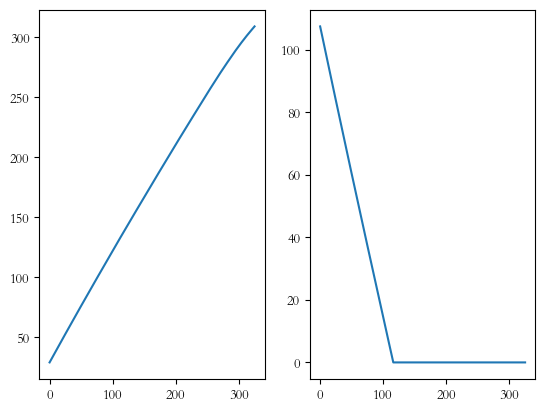

In [101]:
# 数据准备
CAPACITY_THRESHOLDS = {
  3.0 : 2.7, #th 90% - min 2.1, 70%
  2.85 : 2.7, #th 94.7% - min 2.622, 92%
  2.0 : 1.93, #th 96.5% - min 1.93, 96.5%
  4.0 : 3.77, #th 94.2% - min 3.77 94.2%
  4.9 : 4.7, #th 95.9% - min 4.3, 87.7%
  5.0 : 4.5 #th 90% - min 3.63, 72.6%
}
N_CYCLE = 500
WARMUP_TRAIN = 15
WARMUP_TEST = 30

(train_x, train_y_soh, test_x, test_y_soh,
  train_battery_range, test_battery_range,
  time_train, time_test, current_train, current_test) = dataset_handler.get_discharge_whole_cycle_future(train_names, test_names)

print(train_x.shape)
print(train_battery_range)
# print(time_train)
# print(current_train)

train_y = rul_handler.prepare_y_future(train_names, train_battery_range, train_y_soh, current_train, time_train, CAPACITY_THRESHOLDS)
del globals()["current_train"]
del globals()["time_train"]
test_y = rul_handler.prepare_y_future(test_names, test_battery_range, test_y_soh, current_test, time_test, CAPACITY_THRESHOLDS)
del globals()["current_test"]
del globals()["time_test"]
train_x, test_x = rul_handler.compress_cycle(train_x, test_x)

print(train_x.shape)

x_norm = rul_handler.Normalization()
train_x, test_x = x_norm.fit_and_normalize(train_x, test_x)
train_x = rul_handler.battery_life_to_time_series(train_x, N_CYCLE, train_battery_range)
test_x = rul_handler.battery_life_to_time_series(test_x, N_CYCLE, test_battery_range)

train_x, train_y, train_battery_range, train_y_soh = rul_handler.delete_initial(train_x, train_y, train_battery_range, train_y_soh, WARMUP_TRAIN)
test_x, test_y, test_battery_range, test_y_soh = rul_handler.delete_initial(test_x, test_y, test_battery_range, test_y_soh, WARMUP_TEST)

print(train_x.shape)
print(test_y.shape)

print(test_battery_range)
fig, ax = plt.subplots(1, 2)
ax[0].plot(test_y[:,0][0:326])
ax[1].plot(test_y[:,1][0:326])

# first one is SOH, we keep only RUL
train_y = train_y[:,1]
test_y = test_y[:,1]

# 对y进行归一化
y_norm = rul_handler.Normalization()
train_y, test_y = y_norm.fit_and_normalize(train_y, test_y)

In [112]:
# train_y_soh
print(train_battery_range)
print(sum(train_battery_range))

plt.figure(figsize=(8, 6))

a = 0
for idx, b in enumerate(train_battery_range):
    plt.plot(train_y_soh[a:b], zorder=1)
    plt.scatter(list(range(len(train_y_soh[a:b]))), train_y_soh[a:b], s=1, c="orange", zorder=2)
    plt.legend(["plot", "scatter"])
    plt.title(f"训练电池编号：{train_names[idx]}")
    plt.xlabel("循环圈数")
    plt.ylabel("放电容量（Ah）")
    save_path =f"../../assets/thesis_figures/chapter_5/unibo_train_cell{idx + 1}_capacity.jpg"
    plt.savefig(save_path, dpi=1000, bbox_inches="tight")
    plt.clf()
    a = b

# test_y_soh
print(test_battery_range)
print(sum(test_battery_range))

plt.figure(figsize=(8, 6))

a = 0
for idx, b in enumerate(test_battery_range):
    plt.plot(test_y_soh[a:b], zorder=1)
    plt.scatter(list(range(len(test_y_soh[a:b]))), test_y_soh[a:b], s=1, c="orange", zorder=2)
    plt.legend(["plot", "scatter"])
    plt.title(f"测试电池编号：{test_names[idx]}")
    plt.xlabel("循环圈数")
    plt.ylabel("放电容量（Ah）")
    save_path =f"../../assets/thesis_figures/chapter_5/unibo_test_cell{idx + 1}_capacity.jpg"
    plt.savefig(save_path, dpi=1000, bbox_inches="tight")
    plt.clf()
    a = b

[338, 691, 1009, 1493, 1960, 2268, 2566, 2875, 3200, 4185, 5170, 6155, 7140, 8125, 8654, 9177, 9736, 10324, 10912, 11025]
107003
[326, 761, 1048, 1718, 2688, 3197, 3297]
13035


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>